**Objective**:
Learn how to solve a numeric prediction problem using neural network in PyTorch. We will use the following three models in this notebook:

>Model 1:
We will solve a house value prediction problem by using a neural network model with no hidden layer in PyTorch.

>Model 2:
Next, we will learn how to add a hidden layer in the earlier model. We will redo Model 1 with addition of one hidden layer in it.  

>Model 3:
Next, we will learn how to do regularization by dropping out nodes randomly. We will redo Model 2 with addition of regularization.  

**Plan**:
1. Set Environment: Load and understand the libraries needed.
2. Load Data: Load house price data for this lab and explore it.
3. Split Data: Learn how to split data into training, validation and testing
4. Create Datasets
5. Understand components for model training
6. Functions to train & evaluate Models 1, 2 and 3.
7. Train & Evaluate Model 1
> 7.1. Define Hyperparameters <br>
> 7.2. Define Training Configurations <br>
> 7.3. Model Training & Evaluation <br>

8. Train & Evaluate Model 2
> 8.1. Define Hyperparameters <br>
> 8.2. Define Training Configurations <br>
> 8.3. Model Training & Evaluation<br>

9. Train & Evaluate Model 3
> 9.1. Define Hyperparameters <br>
> 9.2. Define Training Configurations <br>
> 9.3. Model Training & Evaluation<br>

10. Model Selection <br>
11. Model Testing or Expected Performance<br>
12. Inference (Predictions) <br>

# <Font color = 'indianred'>**1. Set Environment**

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from google.colab import drive
from pathlib import Path


* `sklearn.datasets` is a module in the popular machine learning library Scikit-learn. It includes methods to load and fetch popular reference datasets. `fetch_california_housing` function is used to load the California Housing dataset, a popular dataset for regression tasks.
* `sklearn.model_selection` is a module in Scikit-learn and it provides a rich set of tools for effectively training, testing, evaluating, and tuning machine learning models. `train_test_split` function is used to split data into random train and test subsets.
* `import torch` imports the PyTorch library, a popular deep learning framework that provides a wide range of tools for building neural networks.
* `import torch.nn` imports PyTorch's neural network module (torch.nn) and contains all the necessary components to build neural networks like layers, activation functions, etc.
* `utils.data` is a sub-module within the `torch` (PyTorch) library. It  provides utilities for efficiently handling and loading data, especially important for dealing with large datasets that cannot be loaded into memory all at once. `Dataloader` is most commonly used component to load data in batches for training neural networks.
* `matplotlib.pyplot` is a module in the Matplotlib library in Python, which is widely used for creating static, interactive, and animated visualizations. `pyplot` is a collection of functions that make Matplotlib work like MATLAB, offering a stateful, easy-to-use interface for plotting graphs and charts.
* The `drive` module allows you to mount your Google Drive in the Colab runtime environment. This means you can access files stored in your Google Drive directly from your Colab notebooks.
* `pathlib` is a module in Python that simplifies the way you work with file paths. The `Path` class is the main entry point to the functionalities provided by the pathlib module. It encapsulates the filesystem path and allows you to perform various operations on it in an easy-to-understand manner.

# <Font color = 'indianred'>**2. Load Data**

In [2]:
# Load the dataset using the earlier imported function fetch_california_housing function
data = fetch_california_housing()

In [3]:
# Print the dataset description
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Features and target variable
X, y = data.data, data.target

# Feature names
print("Feature names:", data.feature_names)

# Displaying the shape of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Features shape: (20640, 8)
Target shape: (20640,)


In [5]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

* `type()` is a built-in Python function that returns the type of the object passed to it.
* `X` often represents the input data or features, and `y` typically represents the labels or targets.
* `numpy.ndarray` stands for N-dimensional array, which is a core data structure provided by NumPy, a popular Python library for numerical computing.
An ndarray is a grid of values that are of the same data type.

# <Font color = 'indianred'>**3. Split Data**

In [6]:
# Splitting the data into training and temporary sets (60% - 40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=37)

# Splitting the temporary set into validation and test sets (50% - 50% of 40%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=37)

# Print the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (12384, 8) (12384,)
Validation set shape: (4128, 8) (4128,)
Test set shape: (4128, 8) (4128,)


* `test_size=0.4`: This parameter specifies the size of the test subset. Here, it's set to 0.4, meaning 40% of the data will go to the test set (X_temp and y_temp), and consequently, 60% will go to the training set (X_train and y_train).
* `random_state=37`: This is a seed for the random number generator. Using the same seed ensures that the split is reproducible; that is, each time you run this code, you'll get the same data split. This can be important for debugging or reporting results.

# <Font color = 'indianred'>**4. Create Dataset**

In the realm of deep learning, it's common to organize data into batches. These are smaller subsets of data, easier to manage during processing. This strategy is essential, especially when handling large datasets, as working with the entire dataset simultaneously might be unfeasible due to memory limitations. Within PyTorch, this batching process is streamlined through the use of DataLoader. DataLoaders require a PyTorch Dataset as their input. Therefore, defining a PyTorch Dataset is a prerequisite to setting up a DataLoader. PyTorch adopts an Object-Oriented Programming (OOP) approach, necessitating the definition of a class before its instances can be utilized. Thus, we begin by creating a CustomDataset class, which then allows us to generate instances for training, validation, and testing datasets.


In [7]:
class CustomDataset(torch.utils.data.Dataset):

  def __init__(self, X, y):
    # Storing feature data (texts)
    self.X = X
    # Storing the target labels
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    # Retrieve the text and corresponding label from the dataset using the index
    inputs = self.X[idx]
    labels = self.y[idx]

    inputs = torch.tensor(inputs, dtype=torch.float32)
    # view(-1) converts scalar to 1-d tensor
    labels = torch.tensor(labels, dtype=torch.float32).view(-1)

    # Packing them into a tuple before returning
    sample = (inputs, labels)

    return sample

* `CustomDataset(torch.utils.data.Dataset)` defines a new class named CustomDataset that inherits from PyTorch's Dataset class, which is a base class for representing a dataset in PyTorch. This custom dataset can then be used with a PyTorch DataLoader to efficiently iterate over the dataset in mini-batches, which is a common practice in training neural network models. The DataLoader takes care of batching the data, shuffling it, and loading it into memory as needed during training.
* Constructor `__init__` method initializes the dataset object.
It takes two parameters X and y, and store them in instance variables self.X and self.y respectively.
* `__len__` method is used to get the number of items in the dataset.
* `__getitem__` method is used to retrieve a single data point from the dataset.
It takes an index idx and uses it to retrieve the corresponding inputs (self.X[idx]) and labels (self.y[idx]) from the dataset.
* `torch.tensor` converts inputs and labels to PyTorch tensors. The conversion from numpy arrays to PyTorch tensors in your custom dataset class facilitates compatibility with PyTorch, and helps to leverage GPU acceleration. The data type is specified as torch.float32.
* `view(-1)` converts the label to a 1-dimensional tensor, if it's a scalar. This is often necessary for compatibility with PyTorch's loss functions and model expectations.

Finally, the method packs the input and label into a tuple sample and returns it.



In [8]:
# Create instances of the CustomDataset class for training, validation, and testing datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)
train_dataset, val_dataset, test_dataset

(<__main__.CustomDataset at 0x79dfc958da50>,
 <__main__.CustomDataset at 0x79dfc958fe80>)

In [9]:
train_dataset[0:2]

(tensor([[   3.3438,   34.0000,    5.0572,    0.9495,  860.0000,    2.8956,
            38.3600, -122.0000],
         [   9.8091,    4.0000,    6.7609,    1.1087,  128.0000,    2.7826,
            33.7500, -118.4100]]),
 tensor([1.3560, 5.0000]))

# <Font color = 'indianred'>**5. Understand Components for Model Training**

There are three crucial elements needed to train a neural network: (1) Data Loaders, (2) The Neural Network Model, and (3) Loss Functions. Besides understanding these components, we will also go through the dimensions and structure of the inputs and outputs. It would help us to troubleshoot and editing the network if needed. The upcoming demonstration will use a small data batch for clarity. Note that this is merely an illustrative example. The actual definition and setup of the components essential for model training will be  covered in the subsequent Section 6.

In [10]:
# Create dataloader with batch size of 2
batch_size = 2
check_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

* DataLoader handles operations like batching, shuffling, and parallelizing the loading process, thereby optimizing the training procedure and ensuring that the neural network receives data in the correct format and size.
* `batch_size = 2` means that two data samples from the dataset will be processed at a time.
*  `shuffle=True`: Shuffling the training data is important to ensure that the model does not learn any order-dependent patterns and generalizes well.
* `shuffle=False`: Unlike training, the validation and testing phases do not require shuffling. Shuffling could introduce variability in the evaluation metrics, making it hard to compare the performance of the model across different runs.

In [11]:
# Iterate over one batch from the training data loader
for batch in check_loader:
    # Unpack the batch
    X_batch, y_batch = batch

    # Display the shapes of the features and target tensors in this batch
    print("Features batch shape:", X_batch.shape)
    print("Target batch shape:", y_batch.shape)

    # Display the data in the batch (for demonstration, showing only the first 5 rows)
    print("\nFeatures batch data (first 5 rows):\n", X_batch[:5])
    print("\nTarget batch data (first 5 rows):\n", y_batch[:5])

    # Break after the first batch to avoid printing all batches
    break

Features batch shape: torch.Size([2, 8])
Target batch shape: torch.Size([2, 1])

Features batch data (first 5 rows):
 tensor([[ 3.1326e+00,  1.7000e+01,  3.8335e+00,  1.0269e+00,  3.3860e+03,
          2.5288e+00,  3.7540e+01, -1.2198e+02],
        [ 7.5260e-01,  5.0000e+00,  2.5797e+00,  1.0373e+00,  2.0310e+03,
          6.8847e+00,  3.8580e+01, -1.2150e+02]])

Target batch data (first 5 rows):
 tensor([[2.2080],
        [1.6250]])


* `for batch...` begins a loop over the training data loader (`train_loader`). The data loader provides batches of data from the training dataset (`train_dataset`). Each batch contains a portion of the dataset, with the size of each batch determined by the `batch_size` parameter specified when the `train_loader` was created.
* Each `batch` is unpacked into `X_batch` and `y_batch`. `X_batch` contains the features (input data) for the current batch, and `y_batch` contains the corresponding targets or labels. This unpacking is based on how the dataset was structured; typically, datasets return a tuple (features, labels) for each item. Remember `sample` tuple that was returned in `CustomDataset` class.
* `X_batch` has a shape of [`batch_size`, `feature_size`], it means each batch has number of records/examples/rows = `batch_size` and number of features/columns = `feature_size`.
* `break` statement exits the loop after the first iteration. Without this line, the loop would continue to print information for every batch in the train_loader, which can be quite extensive.

Checking data this way is particularly useful for testing or debugging to ensure that the data loading process is working correctly without going through the entire dataset.

In [12]:
# model
model_1 = nn.Linear(8, 1)

* It creates a linear layer as part of a neural network, using the nn.Linear class from PyTorch's neural network (nn) module. It takes an input tensor with 8 features and transform it to an output tensor with 1 feature.

If it's the only layer in a neural network, this setup could represent a simple linear regression model, mapping 8-dimensional input to a single scalar output. If it's part of a larger network, it could serve as a component in a more complex model, such as for dimensionality reduction or as a hidden layer in a multilayer network.

Next, we will understand the dimensions of a model output / prediction.

In [13]:
# calculate predictions
output = model_1(X_batch)
output.shape

torch.Size([2, 1])

* Abve, the model, `model_1` is being used to calculate predictions based on the input data `X_batch`. This input data needs to have a shape matching the model's input requirement. Since `model_1` was defined an `nn.Linear(8,1)` layer with 8 input features, `X_batch` should have a shape `[batch_size, 8]`.
* `output.shape` gives the shape of the output tensor. Since the model was defined as `nn.Linear(8,1)` layer with 1 output feature, the expected shape of output would be `[batch_size, 1]`.

In [14]:
# calculate loss
# Define the MSE loss function
loss_function = nn.MSELoss()
loss = loss_function(output, y_batch)
loss

tensor(3886.7073, grad_fn=<MseLossBackward0>)

Calculating the loss for a batch of data using the Mean Squared Error (MSE) loss function.
* `loss_function` is an instance of the MSELoss class from PyTorch's neural network module (`torch.nn`).The mean squared error is calculated as the average of the squares of the differences between the predicted values and the actual target values.
* `loss_function(output, y_batch)`calculates the loss for a given batch of predictions (output) and corresponding true values (y_batch)

# <Font color = 'indianred'>**6. Functions to train & evaluate Models**</Font>

**Model Training** involves five steps:

0. Initialization: Randomly initialize parameters (weights) (PyTorch class such as `nn.Linear` takes care of this step)
1. Forward pass: Computes the model's predictions for a data batch.
2. Compute loss: Caluclate loss by comparing the model's predictions with the actual target values
3. Backward pass: Calculates the gradients of the loss wrt parameters
4. Update the parameters
5. Repeat steps 1 - 4

Functions to implement model training:

1. `step (inputs, targets, model, device, loss_function, optimizer)` function is used for processing batches from training, validation and test datasets.
> * For a batch from a training dataset, `step` updates weights, calculates loss and predicts outputs.
> * For a batch from a validation dataset, it calculates loss and predict outputs. No updation of weights.
> * For a batch from a test dataset, it only predicts outputs.

3. `train_epoch(train_loader, model, device, loss_function, optimizer)` function updates weights and aggregates loss across batches in an epoch.
    - Uses Dataloader, `train_loader`, to break the entire training dataset (epoch) into batches
    - Passes a batch at a time to `step` function to update weights and get loss for the batch
   - Aggregates loss across batches for the whole dataset (epoch).

4. `val_epoch(valid_loader, model, device, loss_function)` function aggregates loss across batches in an epoch. Note: There is no optimizer passed.
    - Uses Dataloader, `val_loader`, to break the entire validation dataset (epoch) into batches
    - Passes a batch at a time to `step` function to get loss for the batch
   - Aggregates loss across batches for the validation dataset.

5. `train(train_loader, valid_loader, model, optimizer, loss_function, epochs, device)` function trains and validates the model, and returns the history of training and validation loss across epochs.
   - Iterate over epochs and for each epoch call `train_epoch` and `val_epoch`.
   - Tracks and analyzes loss over multiple epochs to monitor and understand the model's performance over epochs.

## <Font color = 'indianred'>*`step()` function*

In [15]:
def step(inputs, targets, model, device, loss_function=None, optimizer=None):
    """
    Performs a forward and backward pass for a given batch of inputs and targets.

    Parameters:
    - inputs (torch.Tensor): The input data for the model.
    - targets (torch.Tensor): The true labels for the input data.
    - model (torch.nn.Module): The neural network model.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module, optional): The loss function to calculate loss.
    - optimizer (torch.optim.Optimizer, optional): The optimizer to update model parameters.

    Returns:
    - loss (float): The computed loss value for a batch (only if loss_function is not None).
    - outputs (torch.Tensor): The predictions for the batch.
    - correct (int): The number of correctly classified samples in the batch.
    """
    # Move the model and data (inputs, targets) to the device
    model = model.to(device)
    inputs = inputs.to(device)
    targets = targets.to(device)

    # Step 1: Forward pass to get the model's predictions
    outputs = model(inputs)

    # Step 2: Compute the loss using the provided loss function
    #loss_function is provided for training batch and validation batch, but not for test batch
    if loss_function:
        loss = loss_function(outputs, targets)

    # Step 3 and 4: Perform backward pass and update model parameters if an optimizer is provided
    # optimizer is provided for training batch but not for validation batch and test batch
    if optimizer:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if loss_function:
      return loss, outputs
    else:
      return None, outputs


`optimizer.zero_grad()` initializes or resets the gradients of all the model's learnable parameters to zero. In PyTorch, when you perform backpropagation to compute gradients, these gradients accumulate by default. To avoid accumulating gradients from previous iterations, you need to zero them out before computing new gradients for the current batch of data.

## <Font color = 'indianred'>*`train_epoch()` function*

In [16]:
def train_epoch(train_loader, model, device, loss_function, optimizer):
    """
    Trains the model for one epoch using the provided data loader and updates the model parameters.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader object for the training set.
    - model (torch.nn.Module): The neural network model to be trained.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to calculate loss.
    - optimizer (torch.optim.Optimizer): The optimizer to update model parameters.

    Returns:
    - train_loss (float): Average training loss for the epoch.
    - train_acc (float): Training accuracy for the epoch.
    """
    # Set the model to training mode
    model.train()

    # Initialize variables to track running training loss and correct predictions
    running_train_loss = 0.0

    # Iterate over all batches in the training data
    for inputs, targets in train_loader:
        # Perform a forward and backward pass, updating model parameters
        loss, _  = step(inputs, targets, model, device, loss_function, optimizer)

        # Update running loss and correct predictions counter
        running_train_loss += loss.item()

    # Compute average loss and accuracy for the entire training set
    train_loss = running_train_loss / len(train_loader)

    return train_loss


## <Font color = 'indianred'>*`val_epoch()` function*

In [17]:
def val_epoch(valid_loader, model, device, loss_function):
    """
    Validates the model for one epoch using the provided data loader.

    Parameters:
    - valid_loader (torch.utils.data.DataLoader): DataLoader object for the validation set.
    - model (torch.nn.Module): The neural network model to be validated.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to calculate loss.

    Returns:
    - val_loss (float): Average validation loss for the epoch.
    - val_acc (float): Validation accuracy for the epoch.
    """
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to track running validation loss and correct predictions
    running_val_loss = 0.0

    # Disable gradient computation
    with torch.no_grad():
        # Iterate over all batches in the validation data
        for inputs, targets in valid_loader:
            # Perform a forward pass to get loss and number of correct predictions
            loss, _ = step(inputs, targets, model, device, loss_function, optimizer=None)

            # Update running loss and correct predictions counter
            running_val_loss += loss.item()

    # Compute average loss and accuracy for the entire validation set
    val_loss = running_val_loss / len(valid_loader)

    return val_loss


* Omitting `torch.no_grad()` during validation in PyTorch would result in unnecessary computation and storage of gradients, leading to inefficiencies in terms of both memory usage and performance.

## <Font color = 'indianred'>*`train()` function*

In [18]:
def train(train_loader, valid_loader, model, optimizer, loss_function, epochs, device):
    """
    Trains and validates the model, and returns history of train and validation metrics.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader for the training set.
    - valid_loader (torch.utils.data.DataLoader): DataLoader for the validation set.
    - model (torch.nn.Module): Neural network model to train.
    - optimizer (torch.optim.Optimizer): Optimizer algorithm.
    - loss_function (torch.nn.Module): Loss function to calculate the loss.
    - epochs (int): Number of epochs to train the model.
    - device (torch.device): The computing device (CPU or GPU).

    Returns:
    - train_loss_history (list): History of training loss for each epoch.
    - train_acc_history (list): History of training accuracy for each epoch.
    - valid_loss_history (list): History of validation loss for each epoch.
    - valid_acc_history (list): History of validation accuracy for each epoch.
    """

    # Initialize lists to store metrics for each epoch
    train_loss_history = []
    valid_loss_history = []


    # Loop over the number of specified epochs
    for epoch in range(epochs):
        # Train model on training data and capture metrics. This will update the model parameters
        train_loss = train_epoch(train_loader, model, device, loss_function, optimizer)

        # Validate model on validation data and capture metrics. We are not updating weights but using the updated weights
        # to get the validation loss
        valid_loss  = val_epoch(valid_loader, model, device, loss_function)

        # Add loss for this epoch to history
        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        # Output epoch-level summary
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Valid Loss: {valid_loss:.4f}")
        print()

    return train_loss_history, valid_loss_history


# <Font color = 'indianred'>**7. Train & Evaluate Model  1 (Model with Linear Layer only)**

## <Font color = 'indianred'>*7.1 Hyperparameters*

In [19]:
# Hyperparameters
batch_size = 256
learning_rate = 1e-7
number_inputs = 8
number_outputs = 1
epochs = 10

## <Font color = 'indianred'>*7.2 Training & Evaluation Configurations*

In [20]:
# Fixing the seed value for reproducibility across runs
SEED = 2345
torch.manual_seed(SEED)               # Set seed for PyTorch's CPU operations
torch.cuda.manual_seed(SEED)          # Set seed for PyTorch's CUDA (GPU) operations
torch.backends.cudnn.deterministic = True  # Ensure deterministic behavior in CuDNN

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MSE loss function
loss_function = nn.MSELoss()

# model
model_1 = nn.Linear(in_features=number_inputs, out_features=number_outputs, bias = True)

'''
# for consistency with Model 2, you can also write the above as:
# output linear layer
output_layer = nn.Linear(in_features=number_inputs, out_features=number_outputs, bias = True)
model_1 = nn.Sequentital(output_layer)
'''

# Define the optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)

# Define the device for model training (use CUDA if available, else CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

* cuDNN efers to CUDA Deep Neural Network library, a GPU-accelerated library for deep neural networks provided by NVIDIA. PyTorch uses cuDNN for efficient operations on NVIDIA GPUs.
* `torch.backends.cudnn.deterministic = True` is a PyTorch command used to ensure reproducible results in deep learning models at the expense of some computational efficiency.

## <Font color = 'indianred'>*7.3 Model Training & Evaluation*

In [21]:
# Call the train function to train and evaluate the model
train_losses, valid_losses = train(
    train_loader, val_loader, model_1, optimizer, loss_function, epochs, device
)

Epoch 1/10
Train Loss: 8693.6787
Valid Loss: 501.6254

Epoch 2/10
Train Loss: 517.9928
Valid Loss: 391.0927

Epoch 3/10
Train Loss: 449.3654
Valid Loss: 361.2327

Epoch 4/10
Train Loss: 405.1349
Valid Loss: 304.5835

Epoch 5/10
Train Loss: 357.6788
Valid Loss: 313.8436

Epoch 6/10
Train Loss: 312.0220
Valid Loss: 236.6293

Epoch 7/10
Train Loss: 280.2630
Valid Loss: 216.3932

Epoch 8/10
Train Loss: 251.9668
Valid Loss: 184.7734

Epoch 9/10
Train Loss: 219.5947
Valid Loss: 163.0042

Epoch 10/10
Train Loss: 194.2229
Valid Loss: 146.1346



**Plot losses**

We will now plot training and validation losses. This will help us to visualize the losses and understand if the model is overfitting/underfitting.

In [22]:
def plot_history(train_losses, val_losses=None):
    """
    Plot training and validation loss and metrics over epochs.

    Args:
        train_losses (list): List of training losses for each epoch.
        val_losses (list, optional): List of validation losses for each epoch.

    Returns:
        None
    """
    # Creating a list of x-axis labels for epochs starting from 1.
    epochs = range(1, len(train_losses) +1)
    # range (1, 11) would produce labels from 1, 2, ..., 10
    print(epochs)

    # Plotting training and validation losses
    plt.figure()
    plt.plot(epochs, train_losses, label="Train")  # Plot training losses
    if val_losses:  # Check if validation losses are provided
        plt.plot(epochs, val_losses, label="Validation")  # Plot validation losses
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

range(1, 11)


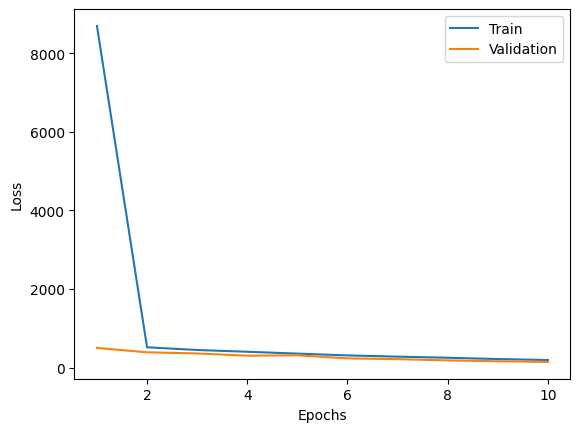

In [23]:
plot_history(train_losses, valid_losses)

**Model checkpointing**

We will save the trained model on Google Drive. Model training can take a long time, so it is a good practice to save the trained model.

In [25]:
drive.mount('/content/drive')
base_folder  = Path('/content/drive/MyDrive/data')
model_folder = base_folder/'models/nlp_spring_2024/numeric_prediction'
model_folder.mkdir(exist_ok = True, parents = True)
model_folder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PosixPath('/content/drive/MyDrive/data/models/nlp_spring_2024/numeric_prediction')

In [26]:
# file name for model to save
file_name_1 = model_folder/'single_layer.pt'

In [27]:
# Saving the learned parameters (weights and biases) of the model_1 to a file specified by file_name_1.
torch.save(model_1.state_dict(), file_name_1 )

* `state_dict()` is a Python method applicable to PyTorch models. It returns a Python dictionary object that maps each layer to its parameter tensor. In simpler terms, the state dictionary contains all the weights and biases of the model.

# <Font color = 'indianred'>**8. Train and Evaluate Model 2 (Model with a Hidden layer)**
In this model, we added a hidden layer before the output linear layer of Model 1. Hence, the Model 2 has 2 linear layers.

## <Font color = 'indianred'>*8.1 Hyperparameters*

In [28]:
# Hyperparameters
batch_size = 256
learning_rate = 1e-7
number_inputs = 8
number_outputs = 1
# number of hidden layer neurons is the only change in hyperparameters from Model 1
number_hidden_1 = 100
epochs = 10

## <Font color = 'indianred'>*8.2 Training & Evaluation Configurations*

In [29]:
# Fixing the seed value for reproducibility across runs
SEED = 2345
torch.manual_seed(SEED)               # Set seed for PyTorch's CPU operations
torch.cuda.manual_seed(SEED)          # Set seed for PyTorch's CUDA (GPU) operations
torch.backends.cudnn.deterministic = True  # Ensure deterministic behavior in CuDNN

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MSE loss function
loss_function = nn.MSELoss()

# model
# Adding hidden layer before the output linear layer. Note the value of out_features
hidden_layer = nn.Linear(in_features=number_inputs, out_features=number_hidden_1, bias = True)
output_layer = nn.Linear(in_features=number_hidden_1, out_features=number_outputs, bias = True)
# nn.ReLU() is the activation function for layer 1 neurons.
model_2 = nn.Sequential(hidden_layer, nn.ReLU(), output_layer)

# Define the optimizer
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)

# Define the device for model training (use CUDA if available, else CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## <Font color = 'indianred'>*8.3 Model Training & Evaluation*

In [30]:
# Call the train function to train and evaluate the model
train_losses, valid_losses = train(
    train_loader, val_loader, model_2, optimizer, loss_function, epochs, device
)

Epoch 1/10
Train Loss: 2228.0003
Valid Loss: 229.9510

Epoch 2/10
Train Loss: 79.7240
Valid Loss: 50.3892

Epoch 3/10
Train Loss: 59.1597
Valid Loss: 38.7991

Epoch 4/10
Train Loss: 65.4971
Valid Loss: 30.4809

Epoch 5/10
Train Loss: 51.1504
Valid Loss: 23.6049

Epoch 6/10
Train Loss: 36.3756
Valid Loss: 18.7240

Epoch 7/10
Train Loss: 29.8749
Valid Loss: 15.8073

Epoch 8/10
Train Loss: 25.9313
Valid Loss: 12.7471

Epoch 9/10
Train Loss: 23.9227
Valid Loss: 17.9323

Epoch 10/10
Train Loss: 14.6551
Valid Loss: 10.6192



Note the drop in loss values across Model 1 and Model 2.

**Plot losses**\
Since the function `plot_history` is already defined from earlier, we don't need to redefine it.


range(1, 11)


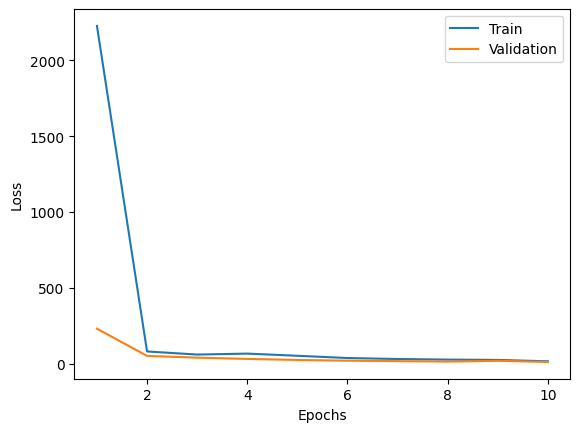

In [31]:
plot_history(train_losses, valid_losses)

**Model checkpointing**\
Next we will save the trained model.

In [32]:
# file name for model to save
file_name_2 = model_folder/'two_layer.pt'

In [33]:
torch.save(model_2.state_dict(), file_name_2 )

# <Font color = 'indianred'>**9. Train & Evaluate Model 3 (Model with a Hidden layer and Dropout)**

## <Font color = 'indianred'>*9.1 Hyperparameters*

In [34]:
# Hyperparameters
batch_size = 256
learning_rate = 1e-7
number_inputs = 8
number_outputs = 1
number_hidden_1 = 100
epochs = 10
# Dropout probability
p1 = 0.25

## <Font color = 'indianred'>*9.2 Training & Evaluation Configurations*

In [35]:
# Fixing the seed value for reproducibility across runs
SEED = 2345
torch.manual_seed(SEED)               # Set seed for PyTorch's CPU operations
torch.cuda.manual_seed(SEED)          # Set seed for PyTorch's CUDA (GPU) operations
torch.backends.cudnn.deterministic = True  # Ensure deterministic behavior in CuDNN

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MSE loss function
loss_function = nn.MSELoss()

# model
hidden_layer = nn.Linear(in_features=number_inputs, out_features=number_hidden_1, bias = True)
output_layer = nn.Linear(in_features=number_hidden_1, out_features=number_outputs, bias = True)
model_3 = nn.Sequential(hidden_layer, nn.ReLU(), nn.Dropout(p1), output_layer)

# Define the optimizer
optimizer = torch.optim.SGD(model_3.parameters(), lr=learning_rate)

# Define the device for model training (use CUDA if available, else CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## <Font color = 'indianred'>*9.3 Model Training & Evaluation*

In [36]:
# Call the train function to train and evaluate the model
train_losses, valid_losses = train(
    train_loader, val_loader, model_3, optimizer, loss_function, epochs, device
)

Epoch 1/10
Train Loss: 7496.0412
Valid Loss: 247.1044

Epoch 2/10
Train Loss: 1626.1513
Valid Loss: 351.4433

Epoch 3/10
Train Loss: 614.1929
Valid Loss: 3.9914

Epoch 4/10
Train Loss: 485.3541
Valid Loss: 74.7029

Epoch 5/10
Train Loss: 232.3930
Valid Loss: 9.5845

Epoch 6/10
Train Loss: 223.5792
Valid Loss: 2.8979

Epoch 7/10
Train Loss: 133.8002
Valid Loss: 2.6577

Epoch 8/10
Train Loss: 73.1790
Valid Loss: 7.5980

Epoch 9/10
Train Loss: 57.9328
Valid Loss: 20.4546

Epoch 10/10
Train Loss: 52.9587
Valid Loss: 2.9048



**Plot losses**

range(1, 11)


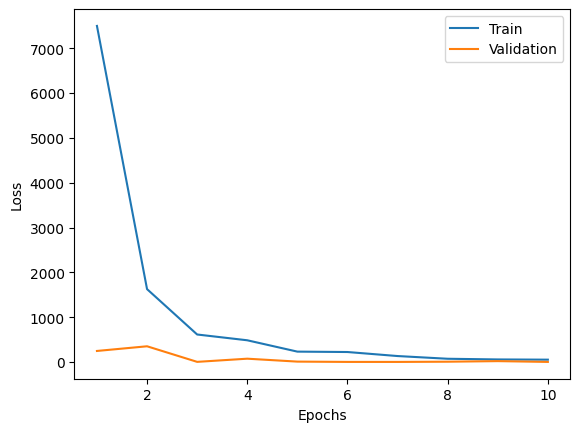

In [37]:
plot_history(train_losses, valid_losses)

**Model checkpointing**


In [38]:
# file name for model to save
file_name_3 = model_folder/'two_layer_dropout.pt'

In [39]:
torch.save(model_3.state_dict(), file_name_3 )

# <Font color = 'indianred'>**10. Model Selection**
Model selection is the process of selecting the most appropriate machine learning model for a given predictive modeling problem. It is a crucial step after evaluating multiple trained models in order to choose the best performing one. The goal of model selection is to pick the model that generalizes well to new, unseen data and achieves the optimal balance of bias and variance.

Model 1 loss after final epoch
* Train Loss: 194.2229
* Valid Loss: 146.1346

Model 2 loss after final epoch
* Train Loss: 14.6551
* Valid Loss: 10.6192

Model 3 loss after final epoch
* Train Loss: 52.9587
* Valid Loss: 2.9048

Based on the above loss values it is clear that Model 3 is the best model of the three.

# <Font color = 'indianred'>**11. Model Testing or Model Expected Performance**
In the Model testing, we focus on assessing the trained model's performance on unseen data, usually the test dataset. This phase generally follows the final model selection and hyperparameter tuning, marking a critical step in confirming the model's expected performance.

In our training, model 3 gave the best performance on validation set. Hence, we will now load the saved checkpoint on model 3 and evaluate the trained model on test dataset.

**Load saved model parameters**

In [40]:
# instantiate model
hidden_layer = nn.Linear(in_features=number_inputs, out_features=number_hidden_1, bias = True)
output_layer = nn.Linear(in_features=number_hidden_1, out_features=number_outputs, bias = True)
trained_model_3 = nn.Sequential(hidden_layer, nn.ReLU(), nn.Dropout(p1), output_layer)

# Load the model's state dictionary from the specified checkpoint file
checkpoint_3 = torch.load(file_name_3)

# Load the saved state dictionary into the model
trained_model_3.load_state_dict(checkpoint_3)

<All keys matched successfully>

**Evaluate Model on Test Set**

In [43]:
def get_pred(data_loader, model, device):
    """
    Function to get predictions for a given data using a trained model
    Input: data iterator, model, device
    Output: predictions and labels
    """

    # Create empty tensors to store predictions and actual labels
    predicted_y = torch.Tensor().to(device)
    actual_y = torch.Tensor().to(device)

    # move model to device
    model = model.to(device)
    # Set model to evaluation mode
    model.eval()

    # Iterate over batches from data iterator
    with torch.no_grad():
        for inputs, targets in data_loader:
            # Process the batch to get the outputs

            _, outputs = step(inputs, targets, model, device)

            # Add the predicted labels and actual labels to their respective tensors
            predicted_y = torch.cat((predicted_y, outputs))
            actual_y = torch.cat((actual_y, targets.to(device)))

    # Return tuple containing predictions and labels
    return predicted_y, actual_y

In [44]:
test_predictions_3, test_targets = get_pred(test_loader, trained_model_3, device)

In [45]:
# test loss
test_loss_3 = loss_function(test_predictions_3, test_targets)
test_loss_3

tensor(3.4232, device='cuda:0')

From the above results, we can see that model performed reasonably well on test dataset. We can now use this model to make predictions for new data.

# <Font color = 'indianred'>**12. Inference (Predictions)**

Model inference is the stage in the machine learning process where a trained model is used to make predictions on new, unseen data. Unlike the training or evaluation phases, labels are not required at this stage, as the primary goal is to apply the model's learned patterns and knowledge to generate predictions.


In [ ]:
sample_X = torch.tensor(X_test[0:5]).float().to(device)
sample_X

In [46]:
# House price of the sample
predictions_3 = trained_model_3(sample_X)
predictions_3

NameError: name 'sample_X' is not defined